#**Descriptive Statistics:**

[*********************100%***********************]  7 of 7 completed
<ipython-input-18-d5b160c7cc55>:21: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


Descriptive Statistics:
                   Mean  Standard Deviation  Skewness  Kurtosis
Ticker                                                         
000001.SS   2614.573972          855.963487  0.402058  0.530929
^BVSP      60859.276207        34525.789157  0.387378 -0.805692
^FTSE       6158.028698         1108.367884 -0.284892 -0.664931
^GDAXI      8967.159243         4125.050349  0.561371 -0.645453
^GSPC       2112.014193         1243.313309  1.225986  0.510923
^GSPTSE    13516.299507         4209.560381  0.403833 -0.336410
^N225      17303.563518         7690.986189  1.011769  0.468610


<ipython-input-18-d5b160c7cc55>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data[index].resample('M').mean().plot()


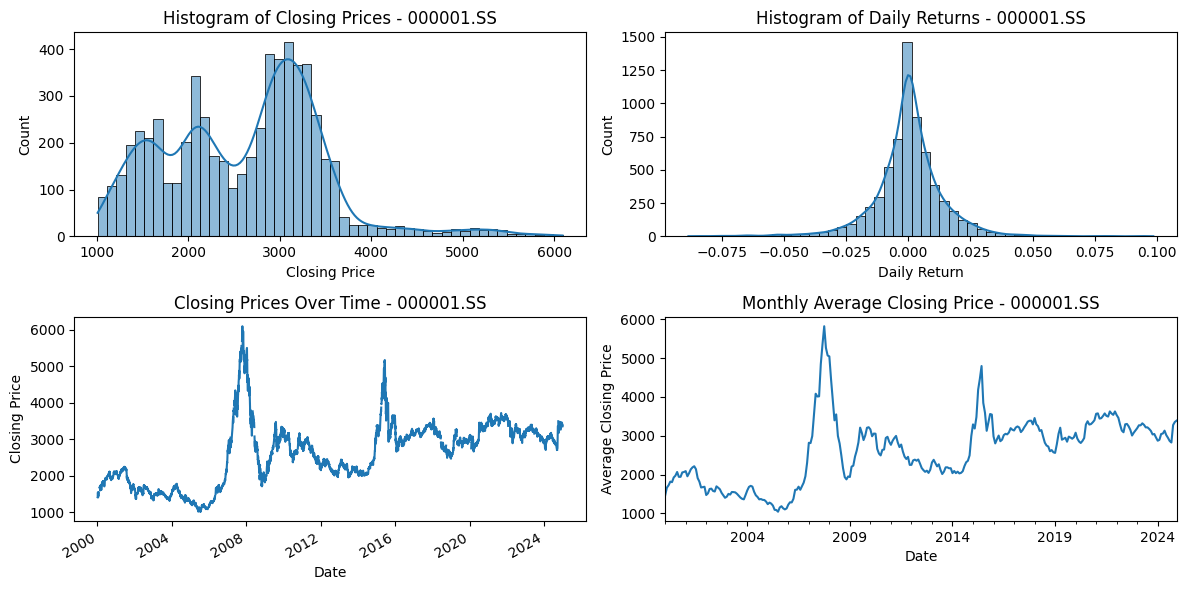

<ipython-input-18-d5b160c7cc55>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data[index].resample('M').mean().plot()


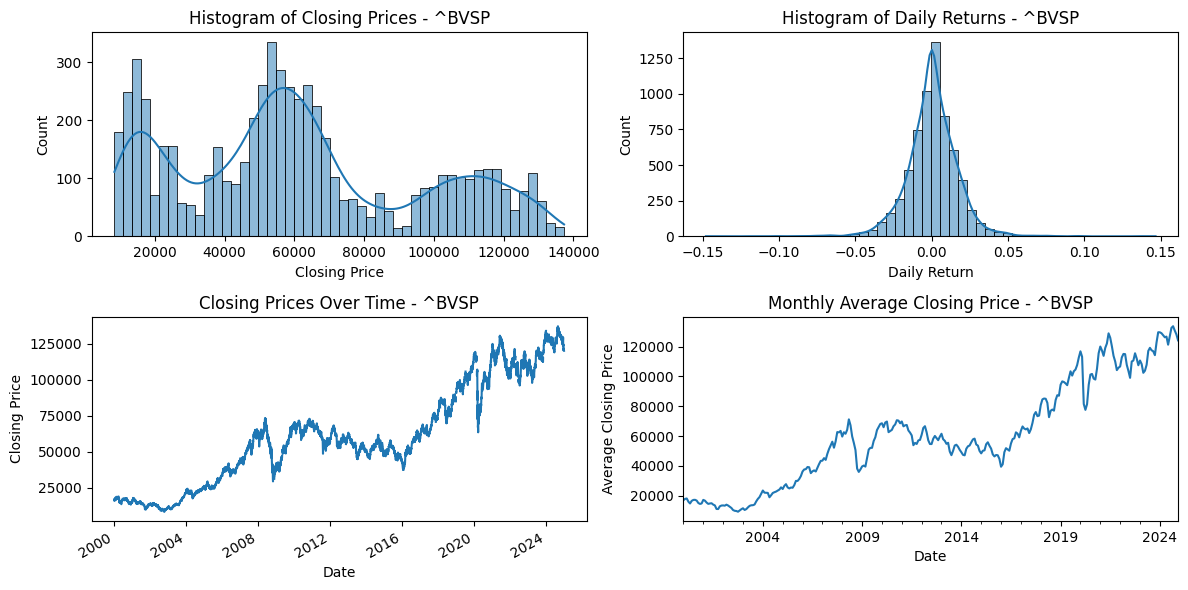

<ipython-input-18-d5b160c7cc55>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data[index].resample('M').mean().plot()


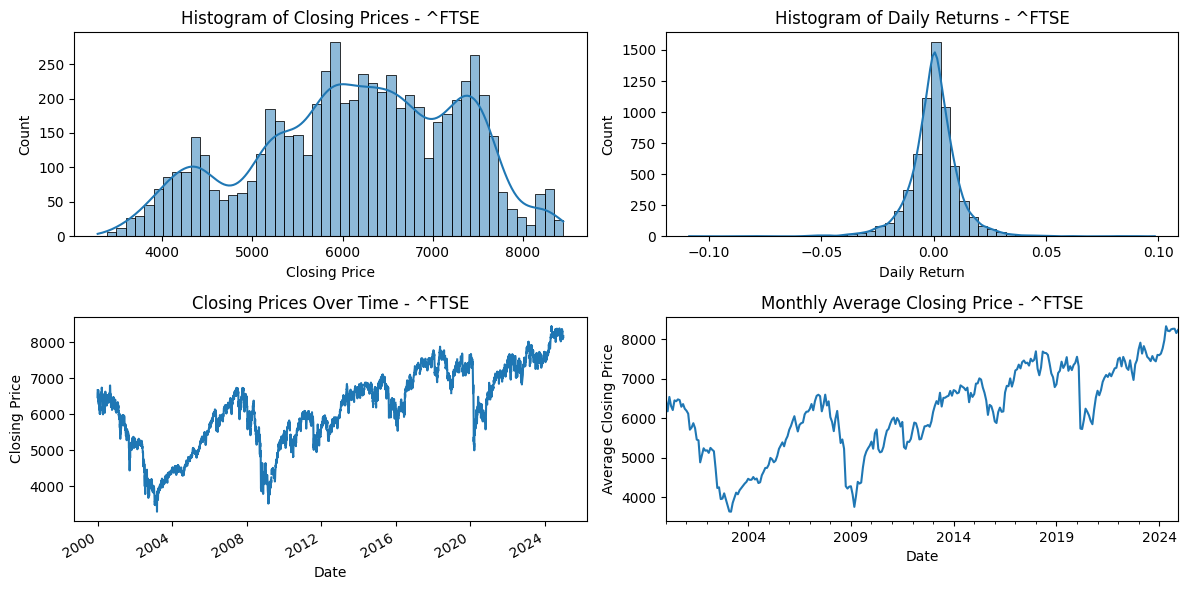

<ipython-input-18-d5b160c7cc55>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data[index].resample('M').mean().plot()


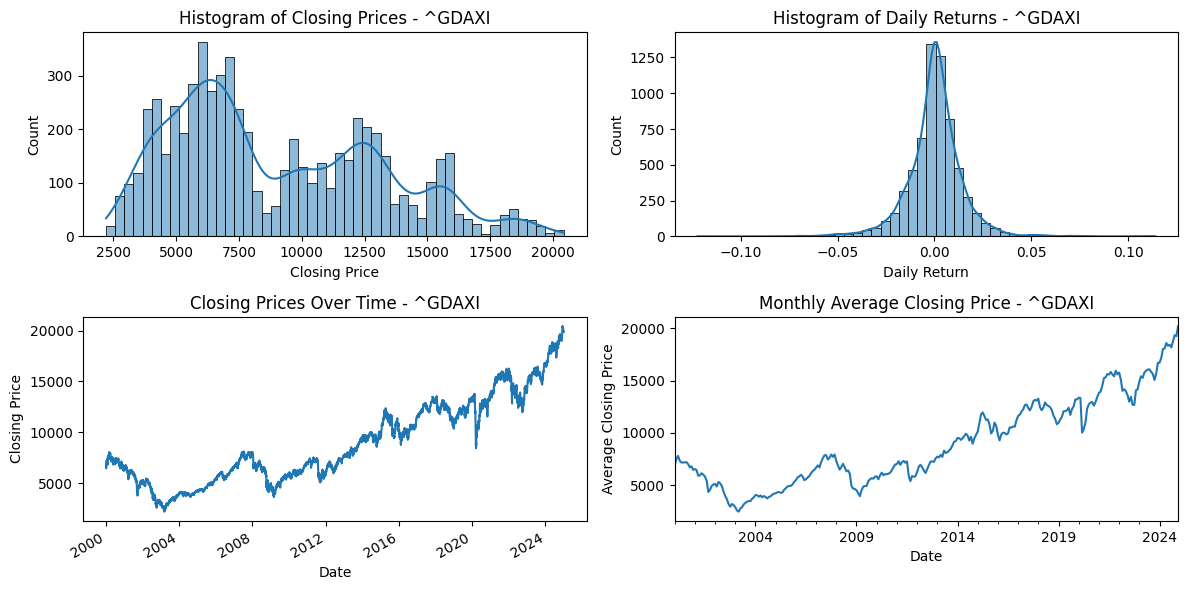

<ipython-input-18-d5b160c7cc55>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data[index].resample('M').mean().plot()


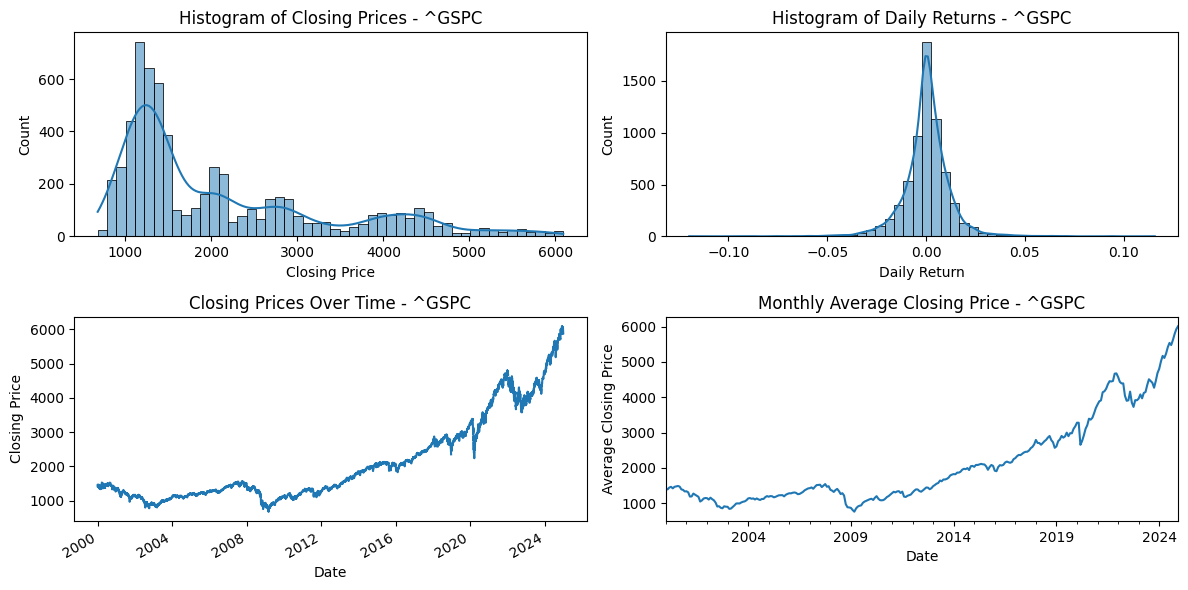

<ipython-input-18-d5b160c7cc55>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data[index].resample('M').mean().plot()


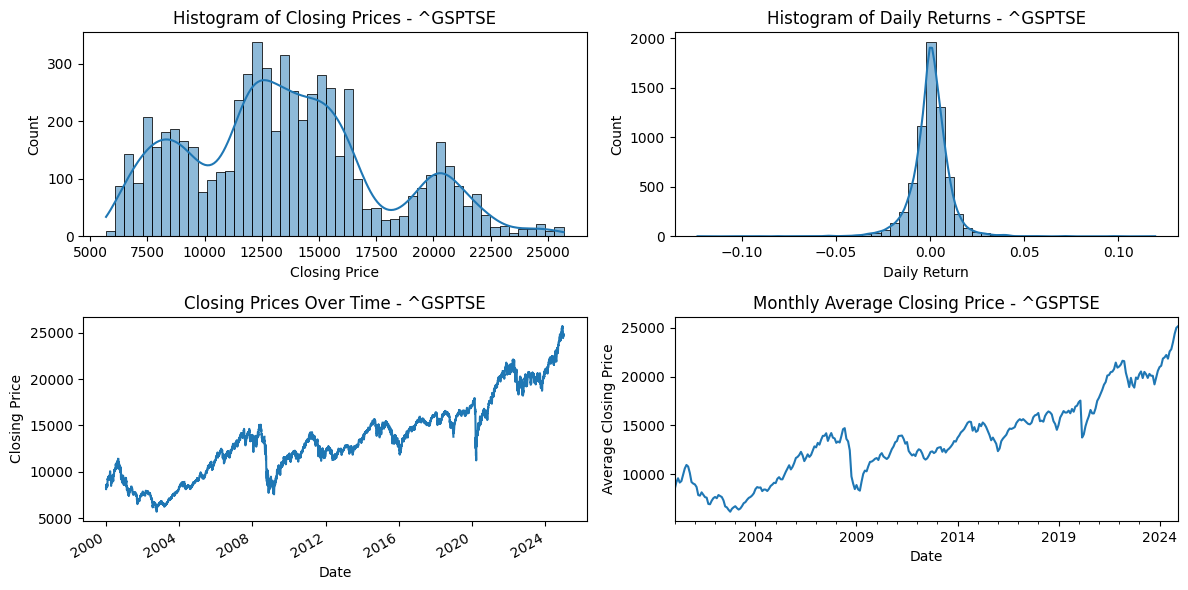

<ipython-input-18-d5b160c7cc55>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data[index].resample('M').mean().plot()


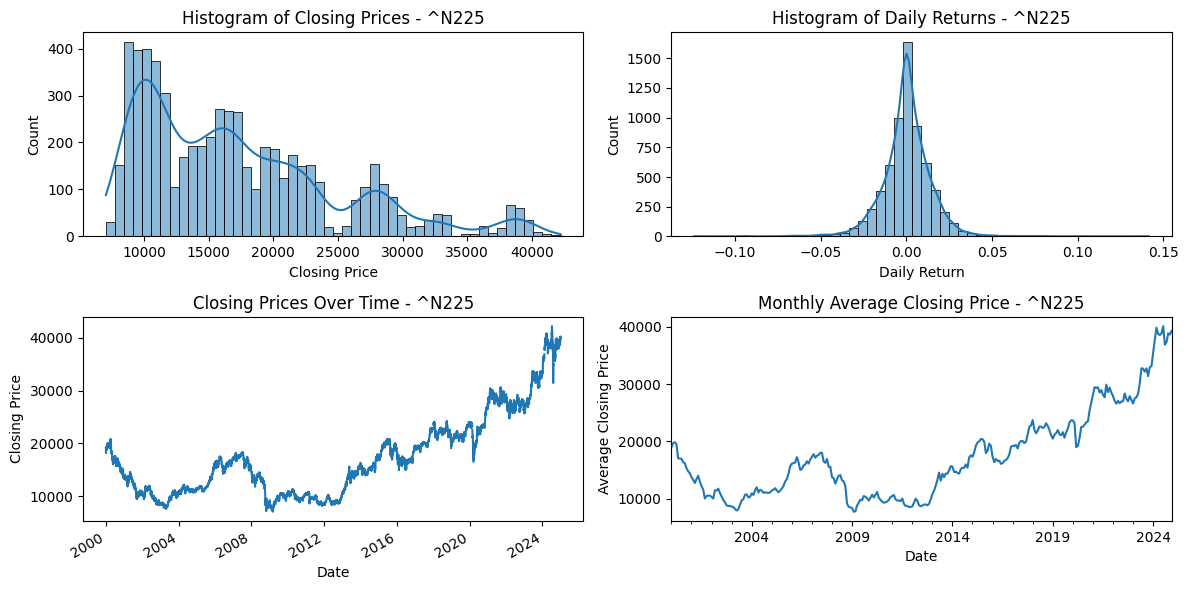

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Define indices and time period
indices = ['^GSPC', '^GSPTSE', '^FTSE', '^GDAXI', '^N225',
             '^BVSP','000001.SS']
start_date = '2000-01-01'
end_date = '2025-01-01'

# Fetch data from Yahoo Finance
data = yf.download(indices, start=start_date, end=end_date)['Close']

# Drop any columns with all NaN values
data.dropna(how='all', axis=1, inplace=True)

# Compute daily returns
daily_returns = data.pct_change().dropna()

# Create descriptive statistics DataFrame
descriptive_stats = pd.DataFrame({
    'Mean': data.mean(),
    'Standard Deviation': data.std(),
    'Skewness': data.skew(),
    'Kurtosis': data.kurtosis()
})

print("Descriptive Statistics:")
print(descriptive_stats)

# Plot for each index
for index in data.columns:
    plt.figure(figsize=(12, 6))

    # Histogram of closing prices
    plt.subplot(2, 2, 1)
    sns.histplot(data[index].dropna(), bins=50, kde=True)
    plt.title(f'Histogram of Closing Prices - {index}')
    plt.xlabel('Closing Price')

    # Histogram of daily returns
    plt.subplot(2, 2, 2)
    sns.histplot(daily_returns[index].dropna(), bins=50, kde=True)
    plt.title(f'Histogram of Daily Returns - {index}')
    plt.xlabel('Daily Return')

    # Line plot of closing prices over time
    plt.subplot(2, 2, 3)
    data[index].plot()
    plt.title(f'Closing Prices Over Time - {index}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')

    # Monthly average closing price
    plt.subplot(2, 2, 4)
    data[index].resample('M').mean().plot()
    plt.title(f'Monthly Average Closing Price - {index}')
    plt.xlabel('Date')
    plt.ylabel('Average Closing Price')

    plt.tight_layout()
    plt.show()

In [ ]:
df = pd.read_csv(file_name, header=0)  # Ensure the first row is treated as column names


In [ ]:
df = pd.read_csv(file_name, parse_dates=['Date'])  # Ensure 'Date' is read as datetime
df.set_index('Date', inplace=True)


Saving Hong Kong.csv to Hong Kong.csv
Columns in the dataset: Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Mean: 20431.40486287591
Standard Deviation: 5524.361588994515
Kurtosis: -0.6722720059005787
Skewness: -0.2923940323909839

Daily Returns Statistics:
count    5777.000000
mean        0.000185
std         0.014527
min        -0.127000
25%        -0.006857
50%         0.000366
75%         0.007402
max         0.143471
Name: close, dtype: float64


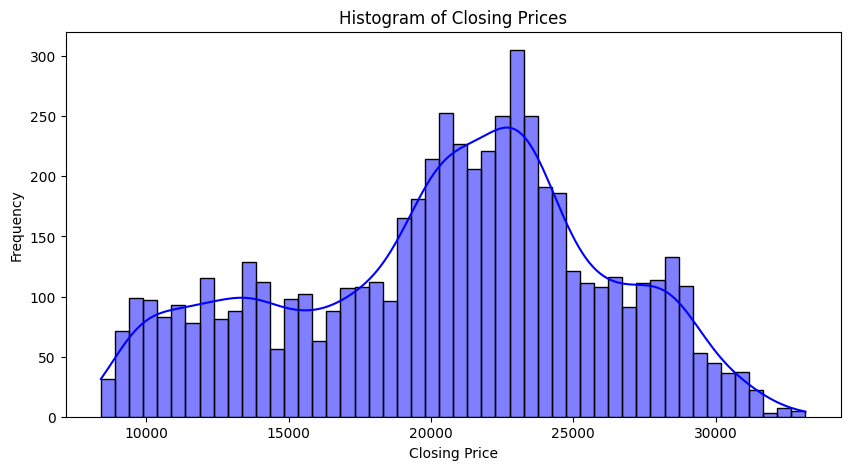

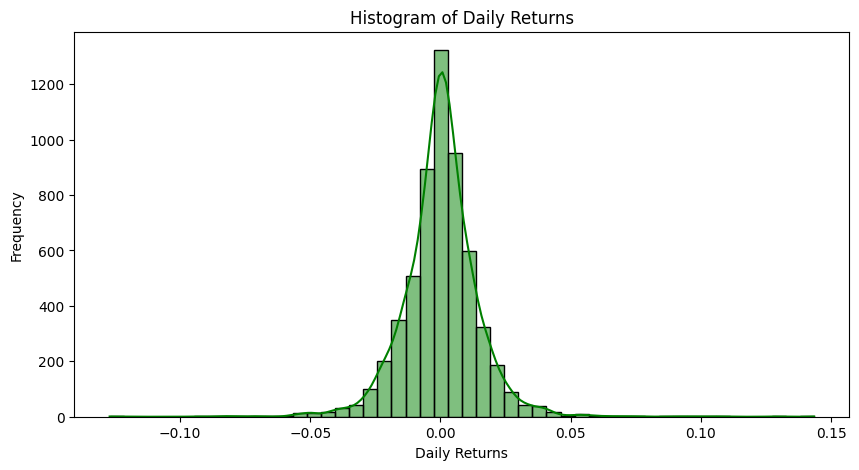

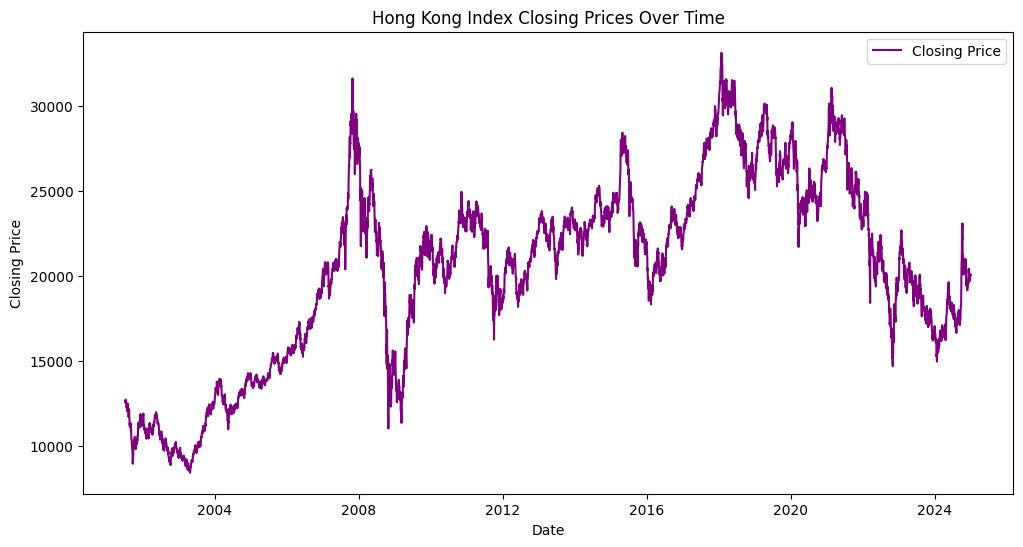

<ipython-input-1-9f2f8adbb9ed>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = close_prices.resample('M').mean()


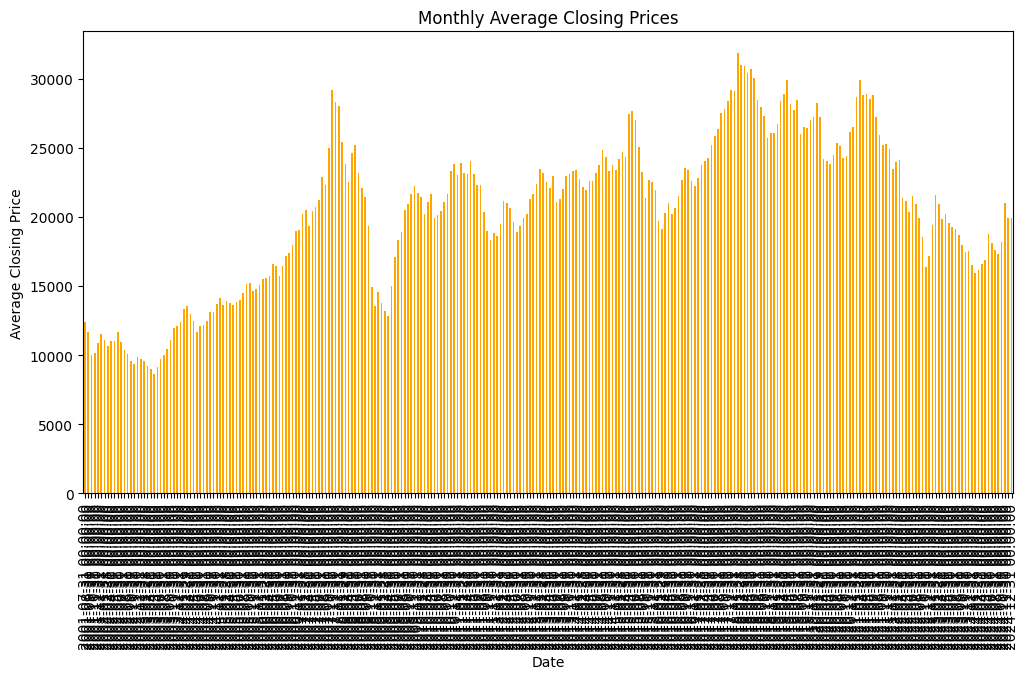

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from google.colab import files

# Step 1: Upload the excek file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Load the CSV file and fix potential issues
df = pd.read_csv(file_name, header=0)  # Ensure correct header

# Check column names
print("Columns in the dataset:", df.columns)

# Strip spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure 'Date' column exists and is in datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    raise KeyError("The column 'Date' is missing from the dataset!")

# Extract Close Prices
close_prices = df['close']

# Descriptive Statistics
mean_value = close_prices.mean()
std_dev = close_prices.std()
kurt = kurtosis(close_prices)
skewness = skew(close_prices)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Kurtosis: {kurt}")
print(f"Skewness: {skewness}")

# Compute Daily Returns
daily_returns = close_prices.pct_change().dropna()

# Descriptive Statistics of Returns
print("\nDaily Returns Statistics:")
print(daily_returns.describe())

# Histogram of Closing Prices
plt.figure(figsize=(10,5))
sns.histplot(close_prices, bins=50, kde=True, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Daily Returns
plt.figure(figsize=(10,5))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

# Time Series Plot of Close Prices
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Closing Price', color='purple')
plt.title("Hong Kong Index Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Bar Chart of Monthly Average Close Prices
monthly_avg = close_prices.resample('M').mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Monthly Average Closing Prices")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.show()


Saving Indonesia.csv to Indonesia.csv
Columns in the dataset: Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Mean: 3693.7055093782888
Standard Deviation: 2338.972983144316
Kurtosis: -1.4399793380165007
Skewness: -0.06295112559337906

Daily Returns Statistics:
count    6065.000000
mean        0.000462
std         0.012645
min        -0.106903
25%        -0.005279
50%         0.000950
75%         0.006749
max         0.101907
Name: close, dtype: float64


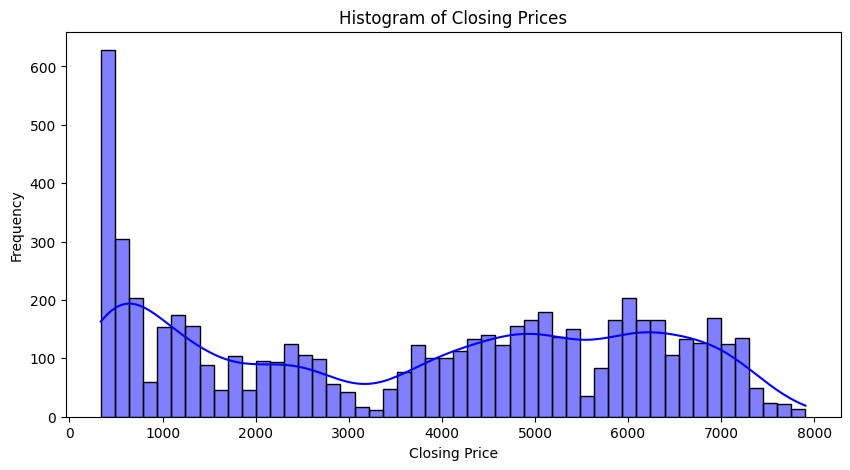

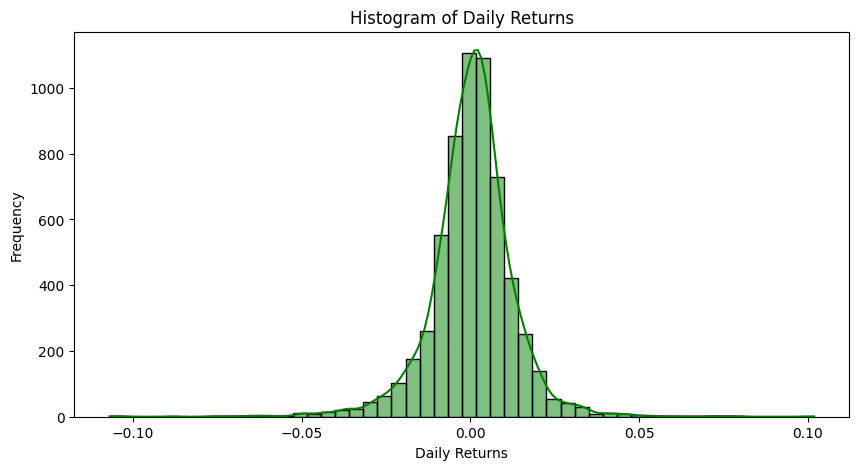

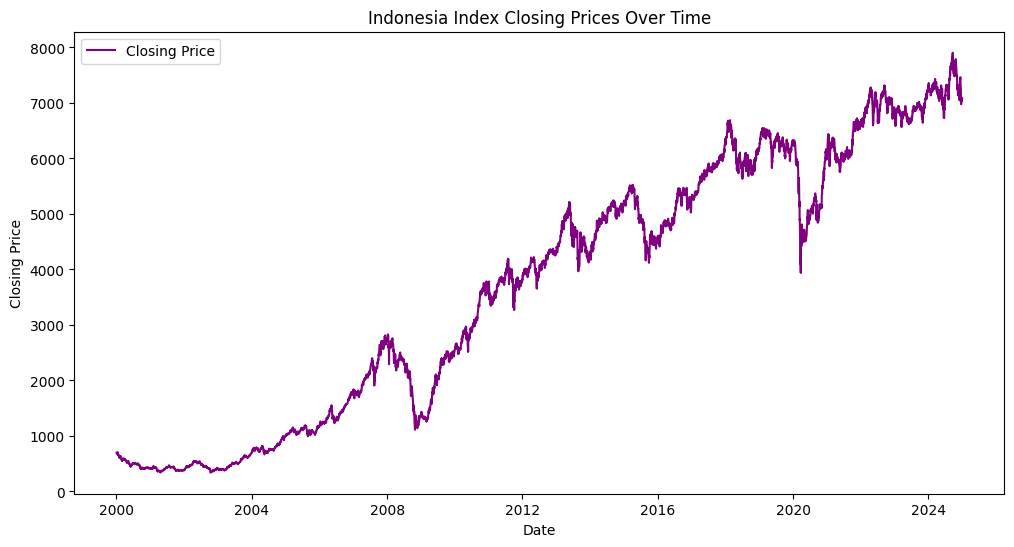

<ipython-input-2-dec3bb95162f>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = close_prices.resample('M').mean()


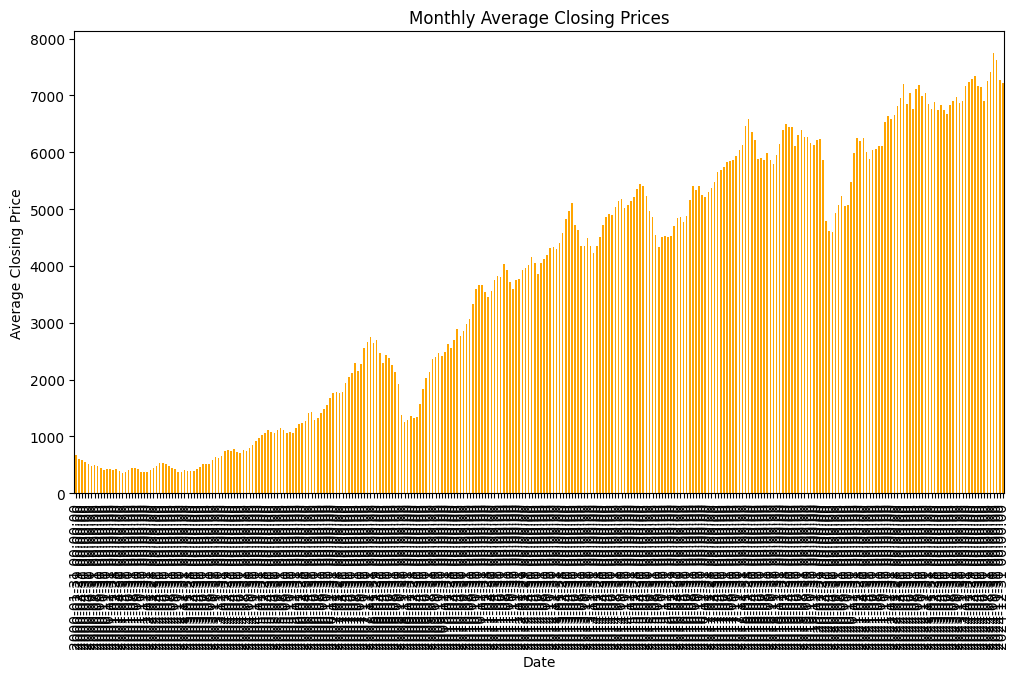

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from google.colab import files  # If using Google Colab

# Step 1: Upload the file manually
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Load the CSV file and fix potential issues
df = pd.read_csv(file_name, header=0)  # Ensure correct header

# Check column names
print("Columns in the dataset:", df.columns)

# Strip spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure 'Date' column exists and is in datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    raise KeyError("The column 'Date' is missing from the dataset!")

# Extract Close Prices
close_prices = df['close']

# Descriptive Statistics
mean_value = close_prices.mean()
std_dev = close_prices.std()
kurt = kurtosis(close_prices)
skewness = skew(close_prices)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Kurtosis: {kurt}")
print(f"Skewness: {skewness}")

# Compute Daily Returns
daily_returns = close_prices.pct_change().dropna()

# Descriptive Statistics of Returns
print("\nDaily Returns Statistics:")
print(daily_returns.describe())

# Histogram of Closing Prices
plt.figure(figsize=(10,5))
sns.histplot(close_prices, bins=50, kde=True, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Daily Returns
plt.figure(figsize=(10,5))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

# Time Series Plot of Close Prices
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Closing Price', color='purple')
plt.title("Indonesia Index Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Bar Chart of Monthly Average Close Prices
monthly_avg = close_prices.resample('M').mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Monthly Average Closing Prices")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.show()


Saving Mexico.csv to Mexico.csv
Columns in the dataset: Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Mean: 34399.35166605085
Standard Deviation: 15301.658288734538
Kurtosis: -0.9220136983164808
Skewness: -0.5937892433059071

Daily Returns Statistics:
count    5918.000000
mean        0.000422
std         0.011767
min        -0.095340
25%        -0.005537
50%         0.000521
75%         0.006536
max         0.110052
Name: close, dtype: float64


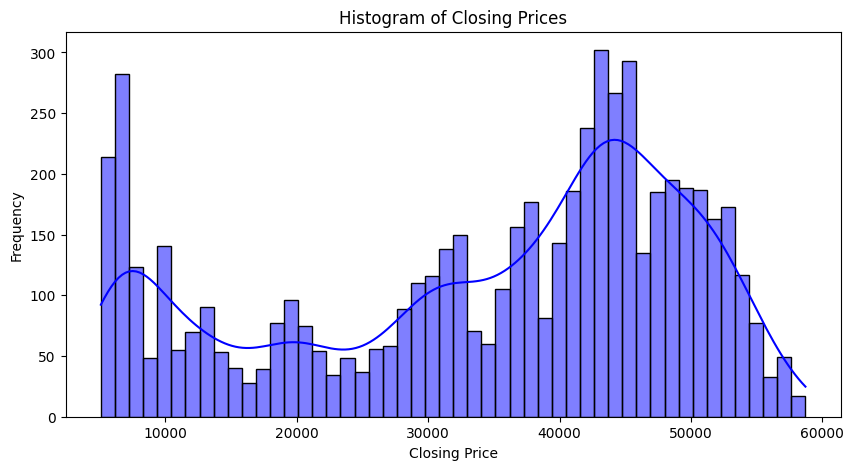

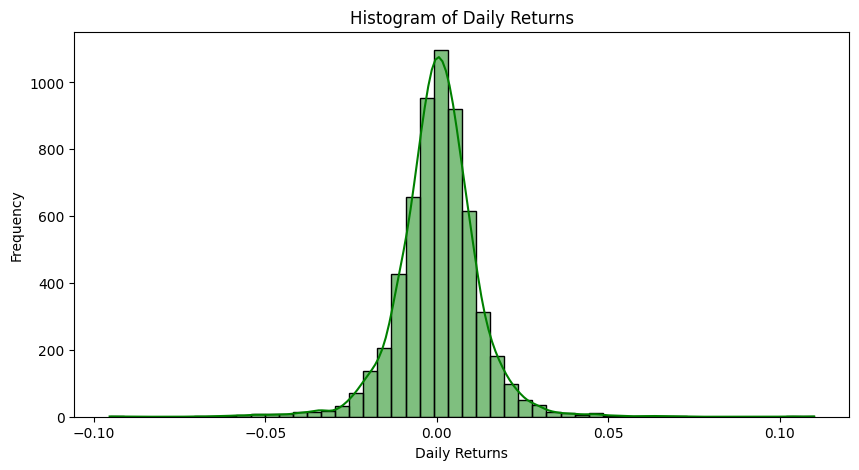

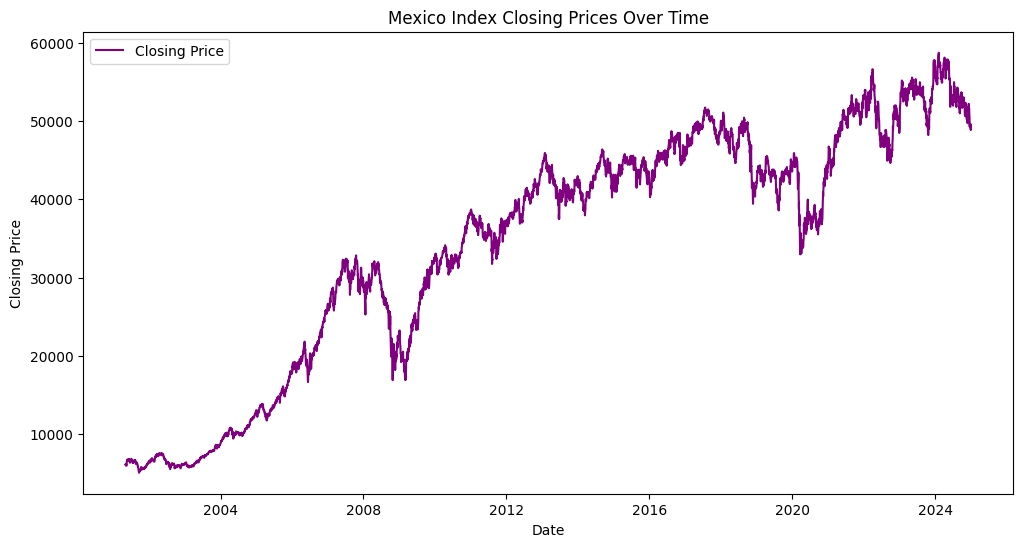

<ipython-input-3-3fdf3a25584e>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = close_prices.resample('M').mean()


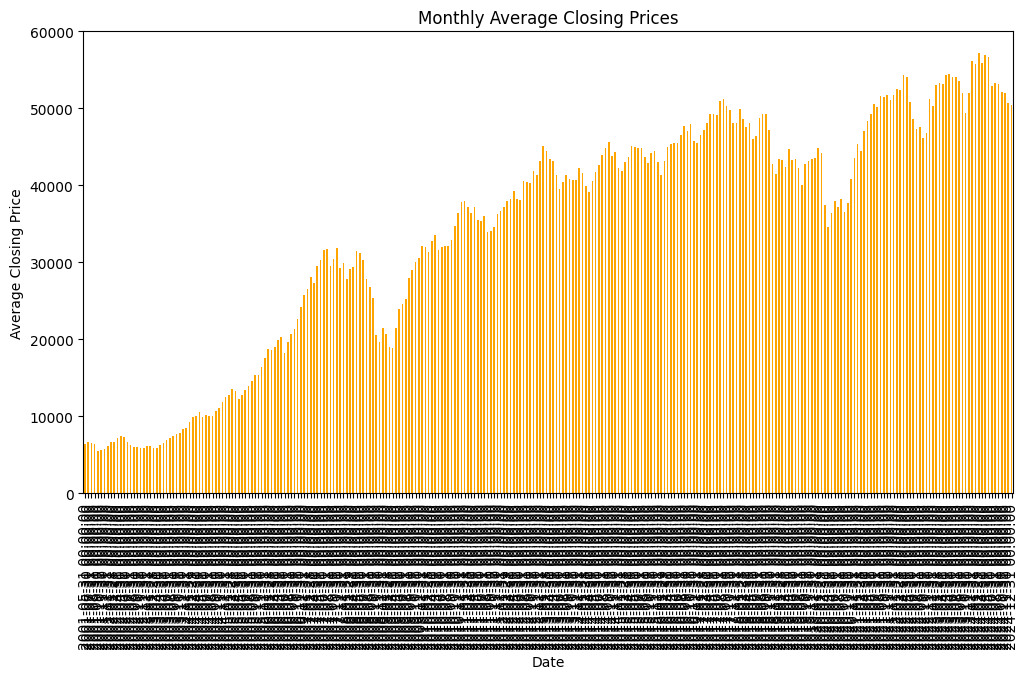

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from google.colab import files  # If using Google Colab

# Step 1: Upload the file manually
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Load the CSV file and fix potential issues
df = pd.read_csv(file_name, header=0)  # Ensure correct header

# Check column names
print("Columns in the dataset:", df.columns)

# Strip spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure 'Date' column exists and is in datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    raise KeyError("The column 'Date' is missing from the dataset!")

# Extract Close Prices
close_prices = df['close']

# Descriptive Statistics
mean_value = close_prices.mean()
std_dev = close_prices.std()
kurt = kurtosis(close_prices)
skewness = skew(close_prices)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Kurtosis: {kurt}")
print(f"Skewness: {skewness}")

# Compute Daily Returns
daily_returns = close_prices.pct_change().dropna()

# Descriptive Statistics of Returns
print("\nDaily Returns Statistics:")
print(daily_returns.describe())

# Histogram of Closing Prices
plt.figure(figsize=(10,5))
sns.histplot(close_prices, bins=50, kde=True, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Daily Returns
plt.figure(figsize=(10,5))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

# Time Series Plot of Close Prices
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Closing Price', color='purple')
plt.title("Mexico Index Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Bar Chart of Monthly Average Close Prices
monthly_avg = close_prices.resample('M').mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Monthly Average Closing Prices")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.show()


Saving Qatar.csv to Qatar (1).csv
Columns in the dataset: Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Mean: 9819.833687515093
Standard Deviation: 1810.1942560221032
Kurtosis: 0.10103551971869074
Skewness: -0.1230760673619569

Daily Returns Statistics:
count    4140.000000
mean        0.000043
std         0.011908
min        -0.097040
25%        -0.004370
50%         0.000259
75%         0.004916
max         0.098801
Name: close, dtype: float64


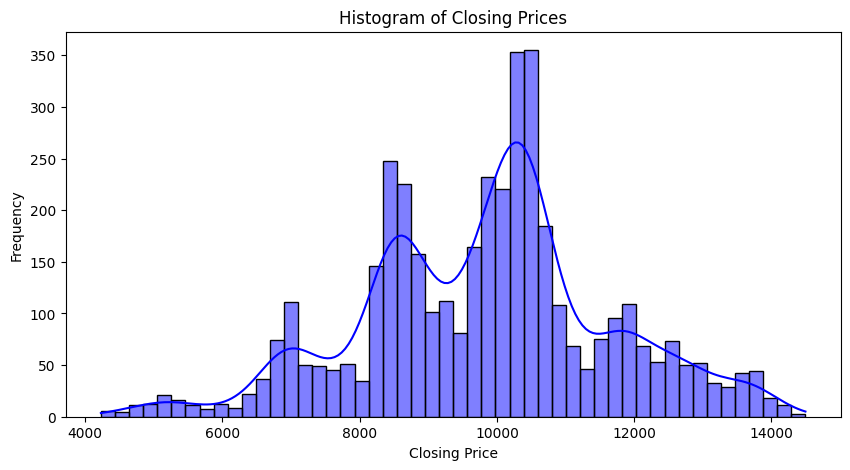

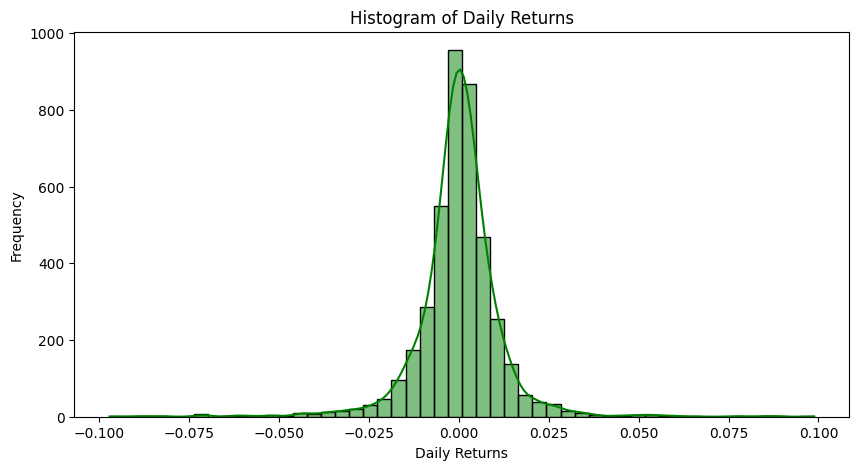

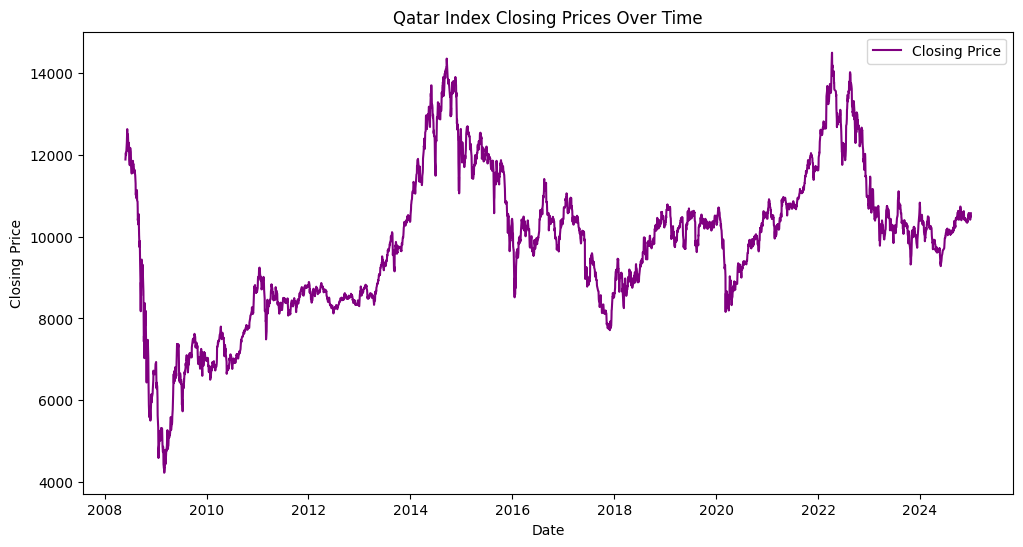

<ipython-input-5-97cb29b8d608>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = close_prices.resample('M').mean()


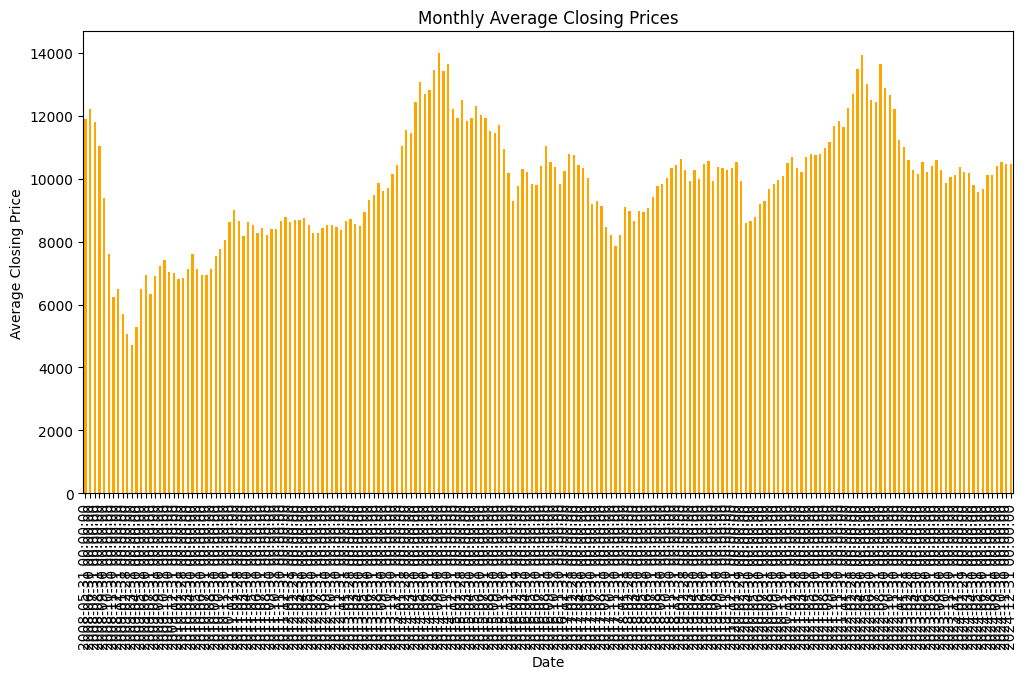

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from google.colab import files  # If using Google Colab

# Step 1: Upload the file manually
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Load the CSV file and fix potential issues
df = pd.read_csv(file_name, header=0)  # Ensure correct header

# Check column names
print("Columns in the dataset:", df.columns)

# Strip spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure 'Date' column exists and is in datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    raise KeyError("The column 'Date' is missing from the dataset!")

# Extract Close Prices
close_prices = df['close']

# Descriptive Statistics
mean_value = close_prices.mean()
std_dev = close_prices.std()
kurt = kurtosis(close_prices)
skewness = skew(close_prices)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Kurtosis: {kurt}")
print(f"Skewness: {skewness}")

# Compute Daily Returns
daily_returns = close_prices.pct_change().dropna()

# Descriptive Statistics of Returns
print("\nDaily Returns Statistics:")
print(daily_returns.describe())

# Histogram of Closing Prices
plt.figure(figsize=(10,5))
sns.histplot(close_prices, bins=50, kde=True, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Daily Returns
plt.figure(figsize=(10,5))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

# Time Series Plot of Close Prices
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Closing Price', color='purple')
plt.title("Qatar Index Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Bar Chart of Monthly Average Close Prices
monthly_avg = close_prices.resample('M').mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Monthly Average Closing Prices")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.show()


Saving Romania.csv to Romania.csv
Columns in the dataset: Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Mean: 6776.709836695485
Standard Deviation: 3993.2976982611076
Kurtosis: 0.28049228915080704
Skewness: 0.5606971799692552

Daily Returns Statistics:
count    6245.000000
mean        0.000680
std         0.014233
min        -0.122929
25%        -0.005106
50%         0.000712
75%         0.006630
max         0.111427
Name: close, dtype: float64


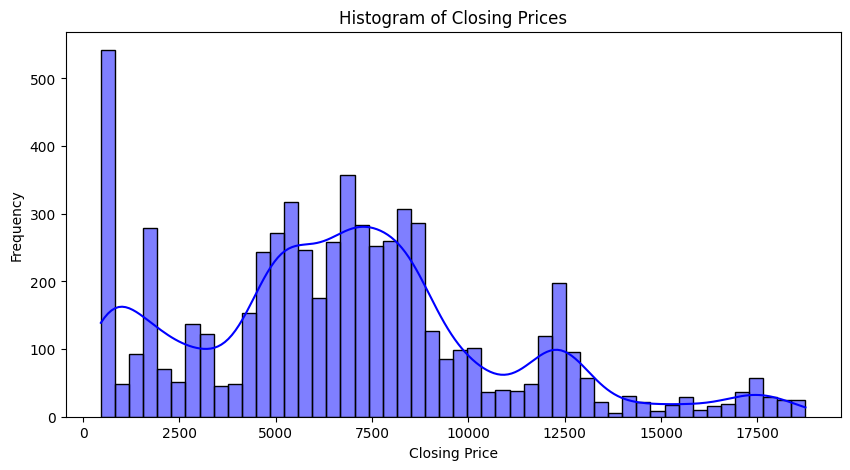

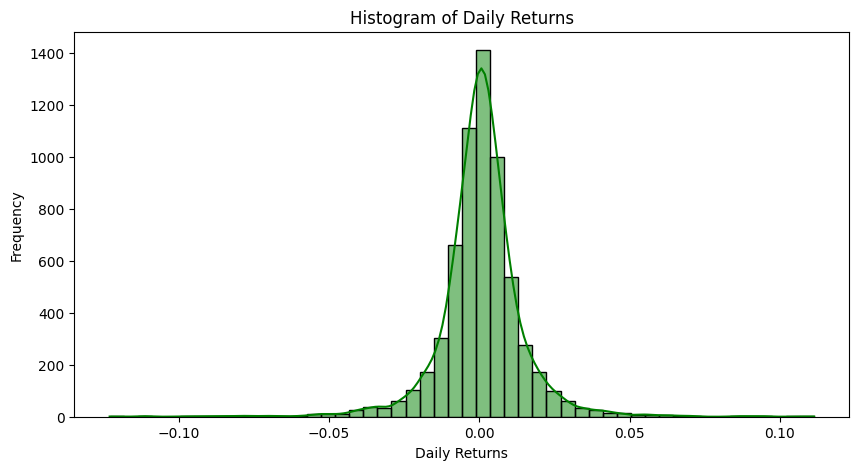

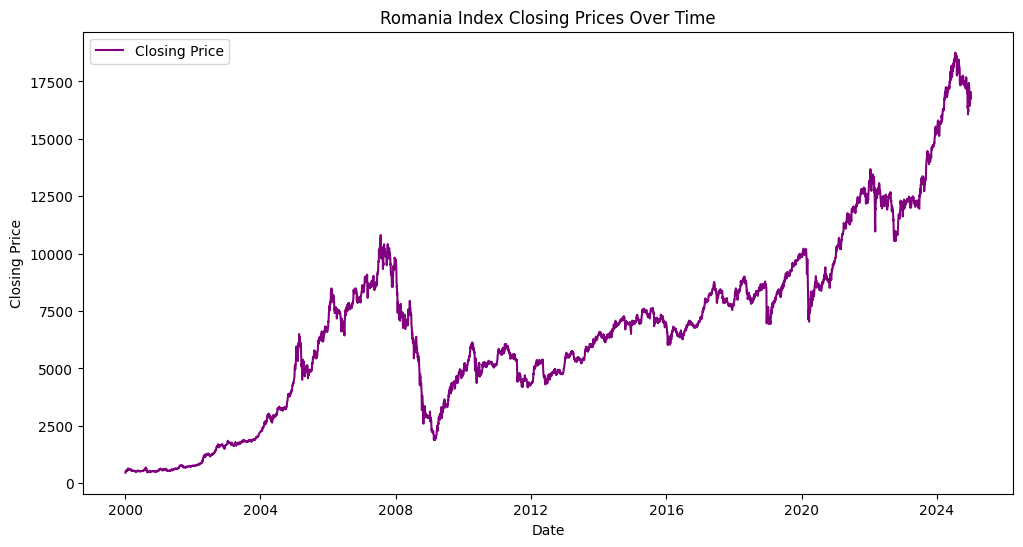

<ipython-input-6-9db86bd0d22e>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = close_prices.resample('M').mean()


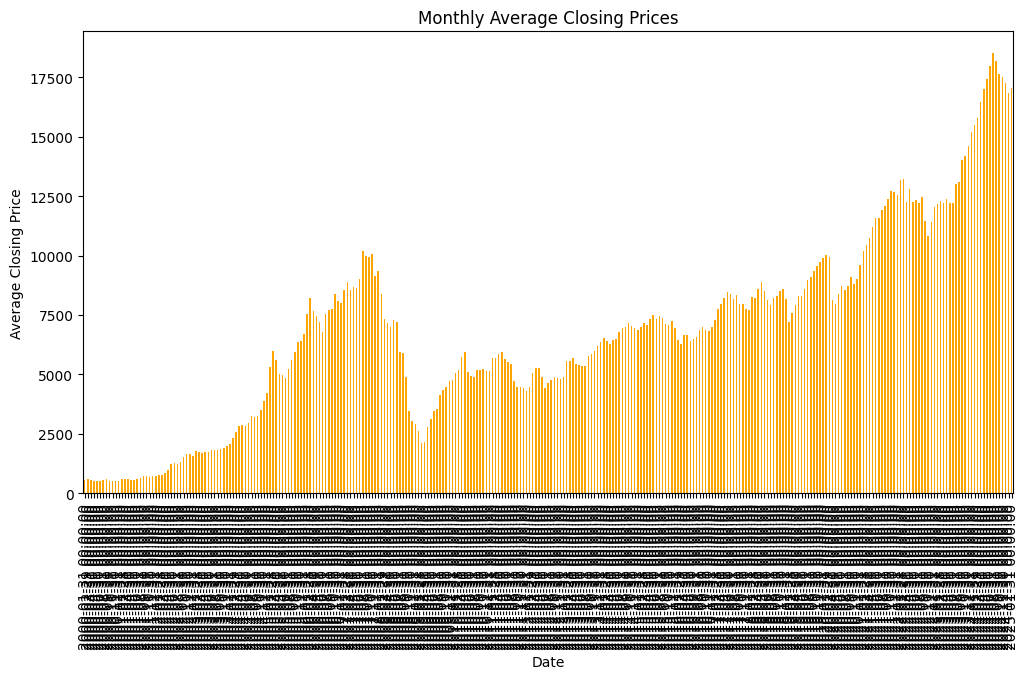

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from google.colab import files  # If using Google Colab

# Step 1: Upload the file manually
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Load the CSV file and fix potential issues
df = pd.read_csv(file_name, header=0)  # Ensure correct header

# Check column names
print("Columns in the dataset:", df.columns)

# Strip spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure 'Date' column exists and is in datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    raise KeyError("The column 'Date' is missing from the dataset!")

# Extract Close Prices
close_prices = df['close']

# Descriptive Statistics
mean_value = close_prices.mean()
std_dev = close_prices.std()
kurt = kurtosis(close_prices)
skewness = skew(close_prices)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Kurtosis: {kurt}")
print(f"Skewness: {skewness}")

# Compute Daily Returns
daily_returns = close_prices.pct_change().dropna()

# Descriptive Statistics of Returns
print("\nDaily Returns Statistics:")
print(daily_returns.describe())

# Histogram of Closing Prices
plt.figure(figsize=(10,5))
sns.histplot(close_prices, bins=50, kde=True, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Daily Returns
plt.figure(figsize=(10,5))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

# Time Series Plot of Close Prices
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Closing Price', color='purple')
plt.title("Romania Index Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Bar Chart of Monthly Average Close Prices
monthly_avg = close_prices.resample('M').mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Monthly Average Closing Prices")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.show()


Saving Saudi Arabia.csv to Saudi Arabia.csv
Columns in the dataset: Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Mean: 8635.639856674681
Standard Deviation: 2149.455570511039
Kurtosis: -0.9827511479768276
Skewness: 0.4132594239186049

Daily Returns Statistics:
count    3285.000000
mean        0.000231
std         0.013016
min        -0.133444
25%        -0.004514
50%         0.000868
75%         0.005945
max         0.117873
Name: close, dtype: float64


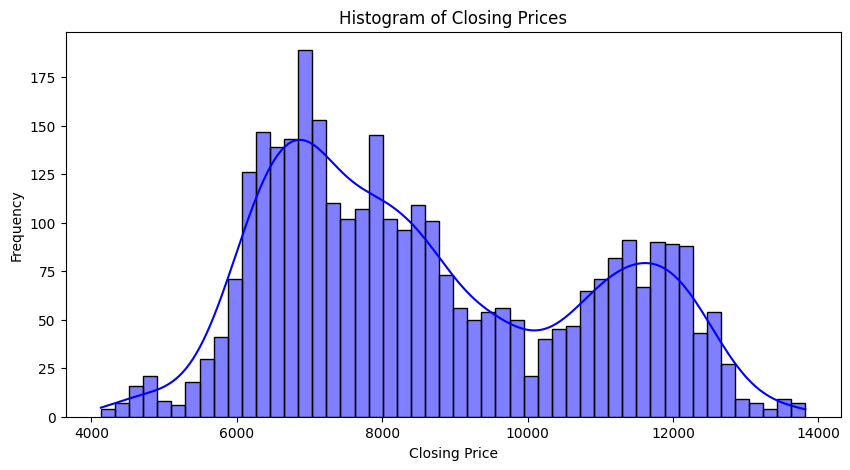

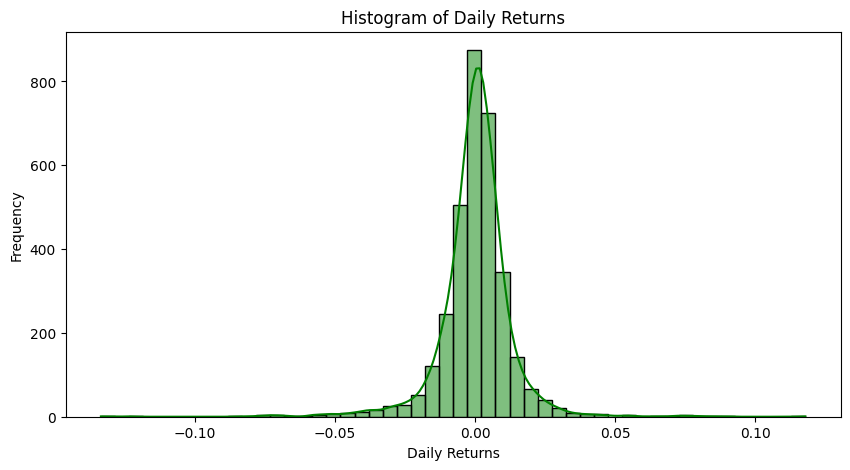

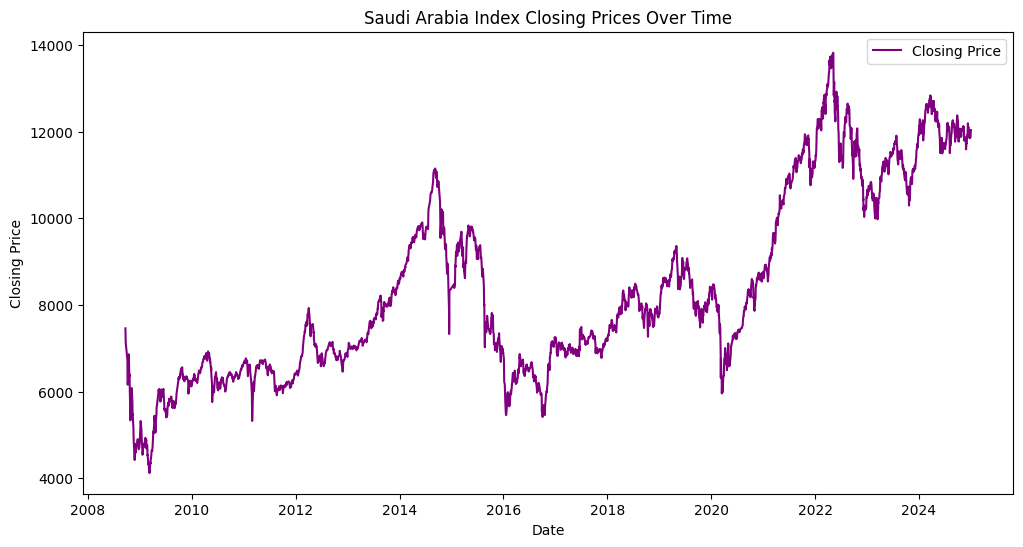

<ipython-input-7-4999c08306c3>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = close_prices.resample('M').mean()


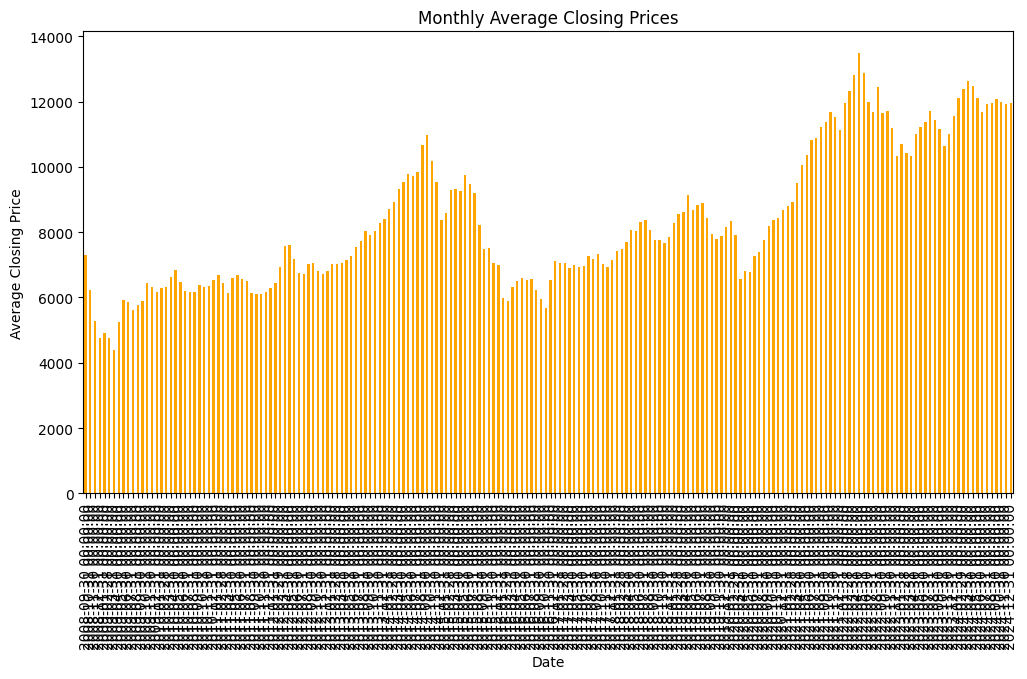

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from google.colab import files  # If using Google Colab

# Step 1: Upload the file manually
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Load the CSV file and fix potential issues
df = pd.read_csv(file_name, header=0)  # Ensure correct header

# Check column names
print("Columns in the dataset:", df.columns)

# Strip spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure 'Date' column exists and is in datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    raise KeyError("The column 'Date' is missing from the dataset!")

# Extract Close Prices
close_prices = df['close']

# Descriptive Statistics
mean_value = close_prices.mean()
std_dev = close_prices.std()
kurt = kurtosis(close_prices)
skewness = skew(close_prices)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Kurtosis: {kurt}")
print(f"Skewness: {skewness}")

# Compute Daily Returns
daily_returns = close_prices.pct_change().dropna()

# Descriptive Statistics of Returns
print("\nDaily Returns Statistics:")
print(daily_returns.describe())

# Histogram of Closing Prices
plt.figure(figsize=(10,5))
sns.histplot(close_prices, bins=50, kde=True, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Daily Returns
plt.figure(figsize=(10,5))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

# Time Series Plot of Close Prices
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Closing Price', color='purple')
plt.title("Saudi Arabia Index Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Bar Chart of Monthly Average Close Prices
monthly_avg = close_prices.resample('M').mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Monthly Average Closing Prices")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.show()


Saving Vietnam.csv to Vietnam.csv
Columns in the dataset: Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Mean: 658.3864316958278
Standard Deviation: 361.1962362813165
Kurtosis: -0.8864297251485849
Skewness: 0.46085033844642465

Daily Returns Statistics:
count    5943.000000
mean        0.000532
std         0.014398
min        -0.073700
25%        -0.005511
50%         0.000608
75%         0.007395
max         0.068826
Name: close, dtype: float64


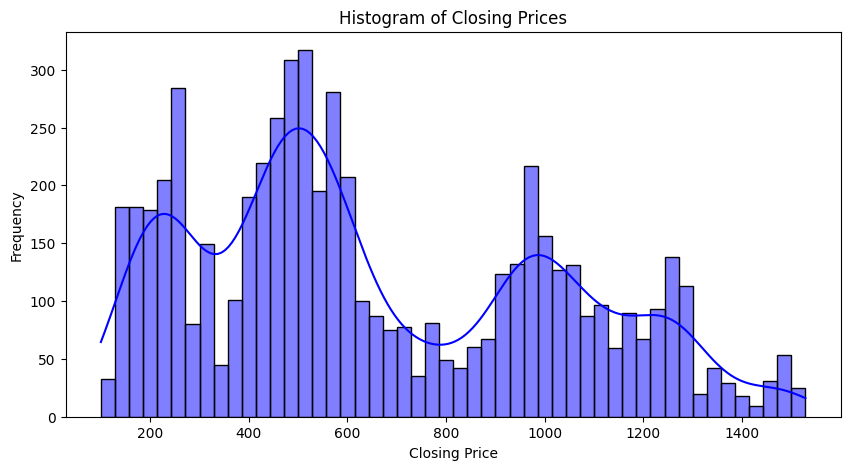

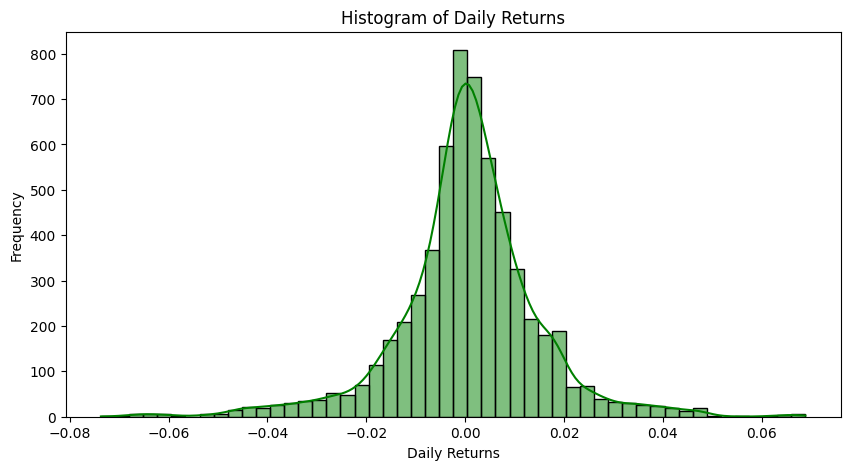

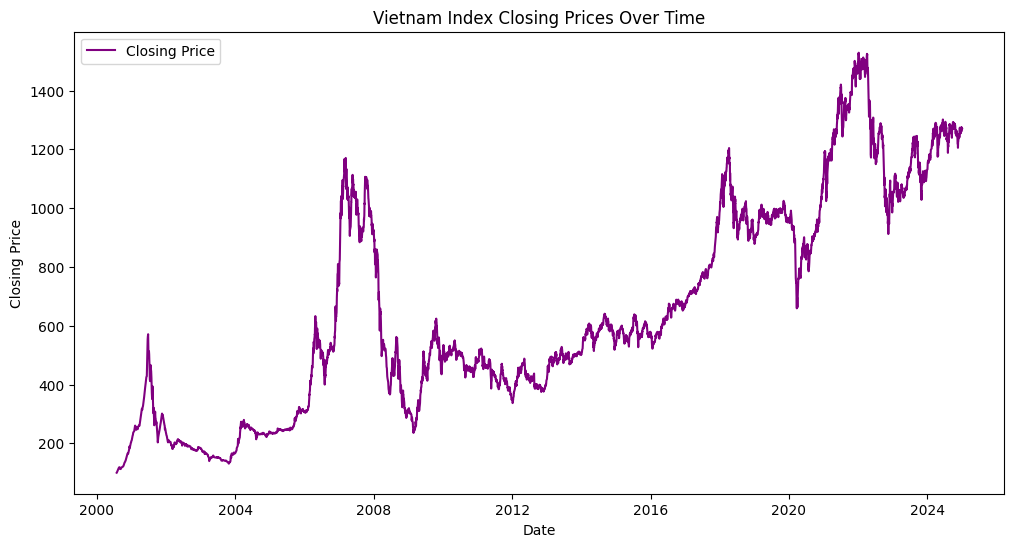

<ipython-input-8-98fe4896ab30>:77: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = close_prices.resample('M').mean()


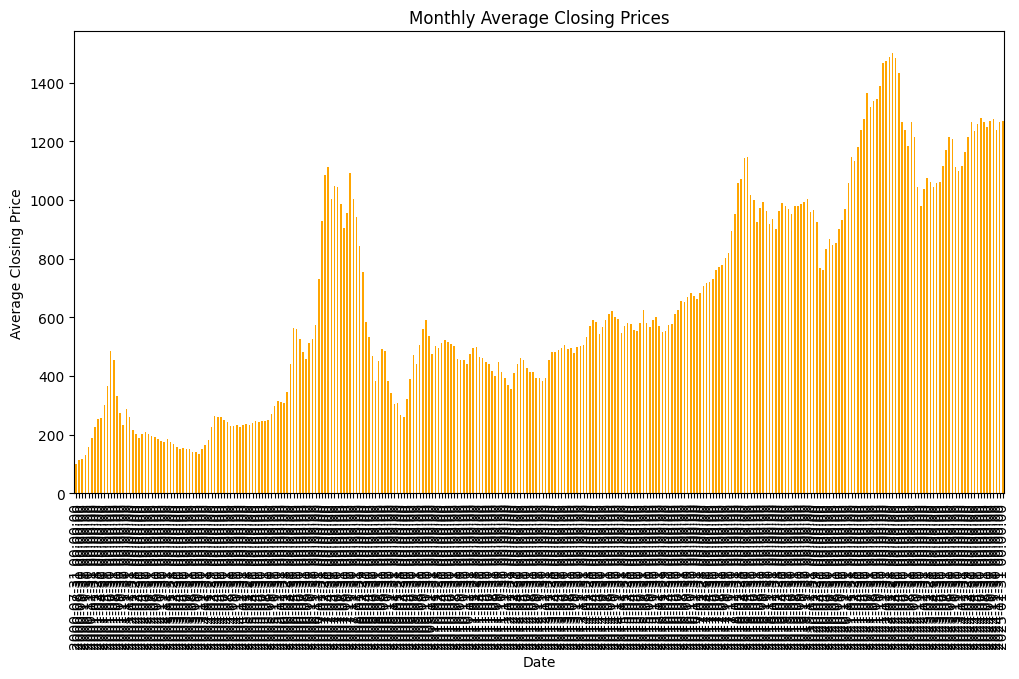

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from google.colab import files  # If using Google Colab

# Step 1: Upload the file manually
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Load the CSV file and fix potential issues
df = pd.read_csv(file_name, header=0)  # Ensure correct header

# Check column names
print("Columns in the dataset:", df.columns)

# Strip spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure 'Date' column exists and is in datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    raise KeyError("The column 'Date' is missing from the dataset!")

# Extract Close Prices
close_prices = df['close']

# Descriptive Statistics
mean_value = close_prices.mean()
std_dev = close_prices.std()
kurt = kurtosis(close_prices)
skewness = skew(close_prices)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Kurtosis: {kurt}")
print(f"Skewness: {skewness}")

# Compute Daily Returns
daily_returns = close_prices.pct_change().dropna()

# Descriptive Statistics of Returns
print("\nDaily Returns Statistics:")
print(daily_returns.describe())

# Histogram of Closing Prices
plt.figure(figsize=(10,5))
sns.histplot(close_prices, bins=50, kde=True, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of Daily Returns
plt.figure(figsize=(10,5))
sns.histplot(daily_returns, bins=50, kde=True, color='green')
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

# Time Series Plot of Close Prices
plt.figure(figsize=(12,6))
plt.plot(close_prices, label='Closing Price', color='purple')
plt.title("Vietnam Index Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Bar Chart of Monthly Average Close Prices
monthly_avg = close_prices.resample('M').mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Monthly Average Closing Prices")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.show()
